<a href="https://colab.research.google.com/github/lisatwyw/data-gym/blob/master/YaleEDdemo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Overview #

In this demo, you'll learn to..
- mount to your own Google drive
- use pyreadr to read RData files
- explore the Yale's ED Triage data using UMap
- save a subset of the entire dataframe to a .pkl using Pickle

Note: You'll use at least 24GB of RAM during your interactive session.





## A) Mount and create subfolder ##

In [7]:
from google.colab import drive
drive.mount('/content/drive')

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
import os

try:
  ! mkdir '/content/drive/My Drive/Colab Notebooks/opensource_datasets/'
except e as Exception:
  pass  

try:
  ! mkdir '/content/drive/My Drive/Colab Notebooks/opensource_datasets/YaleED'
except e as Exception:
  pass  


os.chdir('/content/drive/My Drive/Colab Notebooks/opensource_datasets/YaleED')

mkdir: cannot create directory ‘/content/drive/My Drive/Colab Notebooks/opensource_datasets/’: File exists
mkdir: cannot create directory ‘/content/drive/My Drive/Colab Notebooks/opensource_datasets/YaleED’: File exists


## B) Import pyreadr and read in RData ##

In [6]:
! pip install pyreadr


     |████████████████████████████████| 225kB 2.8MB/s 


In [37]:
! ls

5v_cleandf.RData  small_dat.mat  small_dat.pkl


In [10]:
### another way to load RData

# import rpy2.robjects as robjects
# robjects.r['load'](".RData")

import pyreadr
import pandas as pd

import time

if ( 'data' in globals() ) == False:
  t1=time.perf_counter()
  # this dataset may take 10-40 minutes to load into memory
  data = pyreadr.read_r('5v_cleandf.RData')
  t2=time.perf_counter()
  pd.set_option("display.max_rows", None, "display.max_columns", None)
  try:
    print(data['df'].keys())
  except:
    pass

Index(['dep_name', 'esi', 'age', 'gender', 'ethnicity', 'race', 'lang',
       'religion', 'maritalstatus', 'employstatus',
       ...
       'cc_vaginaldischarge', 'cc_vaginalpain', 'cc_weakness', 'cc_wheezing',
       'cc_withdrawal-alcohol', 'cc_woundcheck', 'cc_woundinfection',
       'cc_woundre-evaluation', 'cc_wristinjury', 'cc_wristpain'],
      dtype='object', length=972)


## C) Look at the first 5 and last 5 samples ##

In [11]:
data['df'].head(5).transpose()

,0,1,2,3,4
dep_name,B,B,B,A,A
esi,4,4,2,2,3
age,40,66,66,66,84
gender,Male,Male,Male,Male,Female
ethnicity,Hispanic or Latino,Hispanic or Latino,Hispanic or Latino,Hispanic or Latino,Hispanic or Latino
race,White or Caucasian,Native Hawaiian or Other Pacific Islander,Native Hawaiian or Other Pacific Islander,Native Hawaiian or Other Pacific Islander,Other
lang,English,English,English,English,Other
religion,None,Pentecostal,Pentecostal,Pentecostal,Pentecostal
maritalstatus,Single,Married,Married,Married,Widowed
employstatus,Full Time,Not Employed,Not Employed,Not Employed,Retired


In [0]:
data['df'].tail(5).transpose()


,560481,560482,560483,560484,560485
dep_name,A,A,A,A,A
esi,2,3,3,3,3
age,49,50,50,50,50
gender,Male,Male,Male,Male,Male
ethnicity,Non-Hispanic,Non-Hispanic,Non-Hispanic,Non-Hispanic,Non-Hispanic
race,White or Caucasian,White or Caucasian,White or Caucasian,White or Caucasian,White or Caucasian
lang,English,English,English,English,English
religion,Episcopal,Episcopal,Episcopal,Episcopal,Episcopal
maritalstatus,Single,Single,Single,Single,Single
employstatus,Disabled,Disabled,Disabled,Disabled,Disabled


In [12]:
print( 'Took ', (t2-t1)/60 , 'minutes to read')


Took  3.627713826166655 to read
ERROR! Session/line number was not unique in database. History logging moved to new session 71


## D) Extract... ##
- Triage-related data fields 
- Sex and age

In [49]:
import numpy as np

sz=data['df'].shape

triage_data = np.zeros( (sz[0],c) )

c=0
for k in data['df'].keys():
  if 'triage' in k:
    v = data['df'][k].values    
    triage_data[:,c]=v
    c+=1
    print( '%s: \trange=[%.1f,%.1f], median=%.1f, STD=%.3f'%(k, np.nanmin(v), np.nanmax(v),  np.nanmedian(v), np.nanstd(v)  ))

triage_vital_hr: 	range=[30.0,280.0], median=84.0, STD=16.717
triage_vital_sbp: 	range=[45.0,312.0], median=131.0, STD=21.319
triage_vital_dbp: 	range=[25.0,214.0], median=80.0, STD=13.867
triage_vital_rr: 	range=[8.0,69.0], median=18.0, STD=1.956
triage_vital_o2: 	range=[60.0,99.0], median=98.0, STD=1.934
triage_vital_o2_device: 	range=[0.0,1.0], median=0.0, STD=0.197
triage_vital_temp: 	range=[90.0,106.0], median=98.0, STD=0.784


In [66]:
race = data['df']['race'].values

age = data['df']['age']
print('Age: IQR' , np.quantile(age,.25), np.quantile(age,.75), np.median(age) )
sex = data['df']['gender']
sex = (sex == 'Female' ).astype(int)
print( np.sum( sex ==1) , np.sum( sex ==0)  )

print(race[:4])


Age: IQR 32.0 64.0 49.0
309653 250833
[White or Caucasian, Native Hawaiian or Other Pacific Islander, Native Hawaiian or Other Pacific Islander, Native Hawaiian or Other Pacific Islander]
Categories (8, object): [American Indian or Alaska Native, Asian, Black or African American,
                         Native Hawaiian or Other Pacific Islander, Other, Patient Refused, Unknown, White or Caucasian]


In [0]:
try:
  import umap
except:
  ! pip install umap-learn
  import umap 

In [17]:
# remove samples with missing data
include =np.where( np.sum(np.isnan(triage_data),1) == 0 )[0]
len(include)

234462

## F) Try Dim-Redux without data rescaling ##

In [94]:
X = triage_data[  include, :] 

embeddings = dict()

t2=time.perf_counter()
embeddings['umap'] = umap.UMAP().fit_transform( X )    
t1=time.perf_counter()

embeddings['umap'].shape

print( 'Took', ( t1 - t2 ), 'seconds for UMap to complete')


/usr/local/lib/python3.6/dist-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../../../usr/local/lib/python3.6/dist-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))


Took 398.39321987100084 seconds for UMap to complete


In [95]:
print( 'Took', ( t1 - t2 ), 'seconds for UMap to complete')
print( 'After dim redux:', embeddings['umap'].shape )


Took 398.39321987100084 seconds for UMap to complete
After dim redux: (234462, 2)


## G) Visualize ##

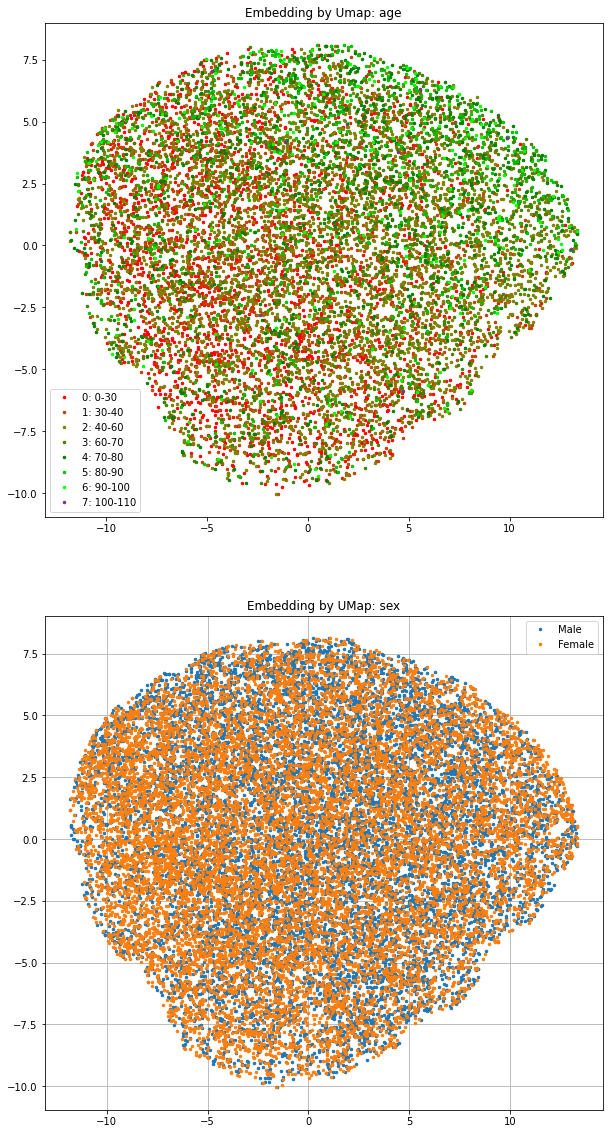

In [105]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=( 10,20 ))  
axes=fig.subplots(2,1)   

clrs=dict()

clrs[0]=[1, 0, 0]
clrs[1]=[.75,.25, 0]
clrs[2]=[.5,.5, 0]
clrs[3]=[.25,.50, 0]
clrs[4]=[0, .50, 0]
clrs[5]=[0, .75, 0]
clrs[6]=[0, 1, 0]
clrs[7]=[0.4940, 0.1840, 0.5560] #[0, .5, .75]
clrs[8]=[0, .25,.50]
clrs[9]=[0, 0, 1]

for s in [0,1]:
  q = np.where( sex[include] == s )[0]
  q= q[::10]
  axes[1].plot(embeddings['umap'][q,0], embeddings['umap'][q,1], '.', markersize=5, label='%s' % encodings['sex'][s] )
  axes[1].set_title('Embedding by UMap: sex')
axes[1].grid()
axes[1].legend()

bins=[0,30,40,60,70,80,90,100,110]
l=0
for i,s in enumerate( bins ):  
  try:
    a = bins[i]
    b = bins[i+1]

    # print(i, a,b)
    q = np.where( age[include] >= a )[0]
    q2 = np.where( age[include] < b )[0]
    q= np.intersect1d( q,q2 )

    l+=len(q)
    q= q[::20]
    axes[0].plot(embeddings['umap'][q,0], embeddings['umap'][q,1], '.', color=clrs[i], label='%d: %d-%d' % (i,a,b), markersize=5 )
    axes[0].set_title('Embedding by Umap: age')
    axes[0].grid()
    axes[0].legend()
  except:    
    pass


## H) Redo reduction; after data-rescaling ##

In [24]:
X = triage_data[  include, :] 

e = X.shape[1] 
if 1:
  for d in enumerate(range(e)):
    v=X[:,d]
    mn=abs(np.nanmin(v))
    mx=np.nanmax(v)
    v=(v-mn)/(mx-mn+1e-10) 
    X[:,d]=v

d=1;
print( np.nanmin( X[:,d] ), np.nanmax( X[:,d] ) )

0.0 0.9999999999996169


In [26]:
embeddings = dict()

t2=time.perf_counter()
embeddings['umap_resc'] = umap.UMAP().fit_transform( X[:, [0,1,2,3,4,6]] )    
t1=time.perf_counter()

embeddings['umap_resc'].shape

print( 'Took', ( t1 - t2 )/60, 'minutes for UMap to complete')

/usr/local/lib/python3.6/dist-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../../../usr/local/lib/python3.6/dist-packages/umap/rp_tree.py", line 135:
@numba.njit(fastmath=True, nogil=True, parallel=True)
def euclidean_random_projection_split(data, indices, rng_state):
^

  state.func_ir.loc))
/usr/local/lib/python3.6/dist-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../../../usr/local/lib/python3.6/dist-packages/umap/nndescent.p

Took 6.744849034683314 minutes for UMap to complete


## I) Visualize again ## 

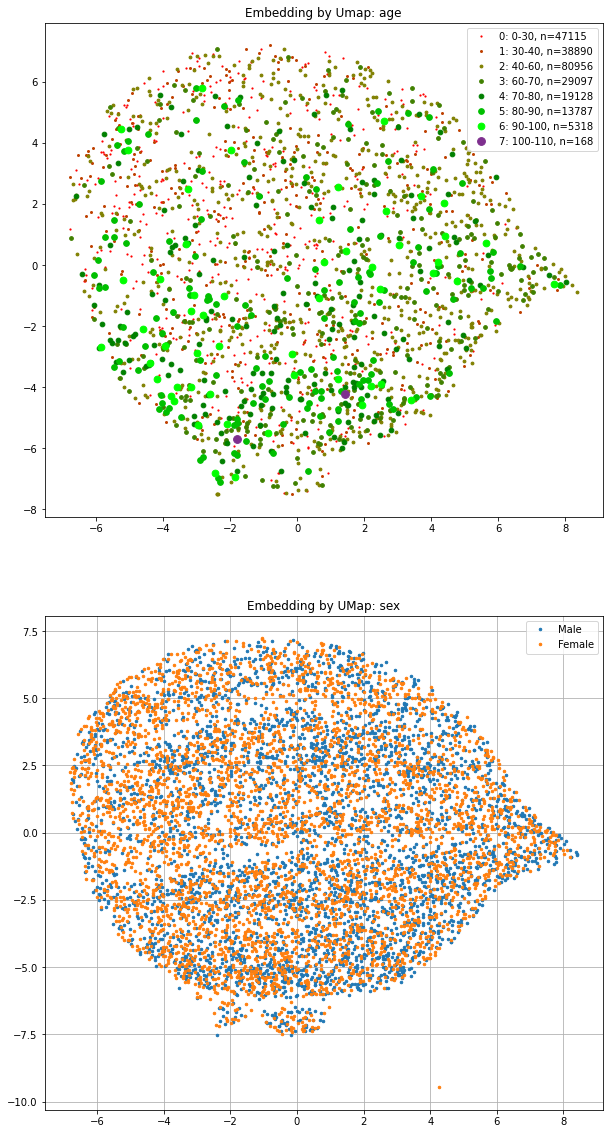

In [39]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=( 10,20 ))  
axes=fig.subplots(2,1)   

clrs=dict()

clrs[0]=[1, 0, 0]
clrs[1]=[.75,.25, 0]
clrs[2]=[.5,.5, 0]
clrs[3]=[.25,.50, 0]
clrs[4]=[0, .50, 0]
clrs[5]=[0, .75, 0]
clrs[6]=[0, 1, 0]
clrs[7]=[0.4940, 0.1840, 0.5560] #[0, .5, .75]
clrs[8]=[0, .25,.50]
clrs[9]=[0, 0, 1]


encodings=dict()
encodings['sex']=['Male', 'Female']

K='umap_resc'

bins=[0,30,40,60,70,80,90,100,110]
l=0
for i,s in enumerate( bins ):  
  try:
    a = bins[i]; b = bins[i+1]
    # print(i, a,b)
    q = np.where( age[include] >= a )[0]
    q2 = np.where( age[include] < b )[0]
    q=m= np.intersect1d( q,q2 )
    l+=len(q)
    q= q[::100]
    axes[0].plot(embeddings[K][q,0], embeddings[K][q,1], '.', color=clrs[i], label='%d: %d-%d, n=%d' % (i,a,b,len(m)), markersize=(i+2)**1.25 )
    axes[0].set_title('Embedding by Umap: age')
    axes[0].grid();  axes[0].legend();    
  except:    
    pass

for s in [0,1]:
  q = np.where( sex[include] == s )[0]
  q= q[::30]
  axes[1].plot(embeddings[K][q,0], embeddings[K][q,1], '.', markersize=5, label='%s' % encodings['sex'][s] )
  axes[1].set_title('Embedding by UMap: sex')
axes[1].grid(); axes[1].legend();

## J) Save a subset to Google drive ##

In [36]:
dat=data['df'].iloc[include,:];

print( dat.shape )

#import scipy.io as spio
#spio.savemat('small_dat.mat', {'dat': dat})

def write_to_pkl( file, dic ):
    from pickle import dump
    f=open( file + '.pkl' , 'wb')
    print( 'writing to', file+'.pkl' )
    dump( dic, f)
    f.close()

write_to_pkl('small_dat', dat )

writing to small_dat.pkl
